In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Description Of the data

### The dataset records hourly network utilization, including metrics such as:

#### 1)ifHCInOctets: Incoming network data in octets.

#### 2)ifHCOutOctets: Outgoing network data in octets.

#### 3)ifInErrors/ifOutErrors: Errors in incoming and outgoing network data.

#### 4)ifInUcastPackets/ifOutUcastPackets: Incoming and outgoing unicast packet counts.



# Questions asked:

Q1: Apply a suitable ARIMA model to the hourly network utilization data, forecast demand for the next seven days, and analyze the results.

Q2: Use an appropriate exponential smoothing model on the hourly network utilization data, generate a seven-day demand forecast, and compare the findings with those of the ARIMA model.

Both analyses will focus on:
1) Gaining insights into the patterns of network utilization.

2) Forecasting future demand to aid in improved network capacity planning.

# Loading the data as a panda data frame

In [2]:
file_path = "/content/linkstats.csv"
data = pd.read_csv(file_path)

# Show the first few rows of the dataset
data.head()


,timestamp,ifHCInOctets,ifHCOutOctets,ifInErrors,ifOutErrors,ifInUcastPackets,ifOutUcastPackets
0,1703858100,3380.495680,2876.390069,0.0,0.0,4.547973,4.646825
1,1703858400,3408.845196,3060.870004,0.0,0.0,4.684506,4.881705
2,1703858700,3378.864965,2789.810337,0.0,0.0,4.659316,4.735553
3,1703859000,3369.610477,3007.387779,0.0,0.0,4.510157,4.723786
4,1703859300,3411.716231,2774.699436,0.0,0.0,4.493931,4.608065


### I have plotted the ifHCInOctets metric (incoming network data) to visualize the hourly network utilization:
### The time series shows some variability in the data, but no obvious seasonal trends are visible at this scale.

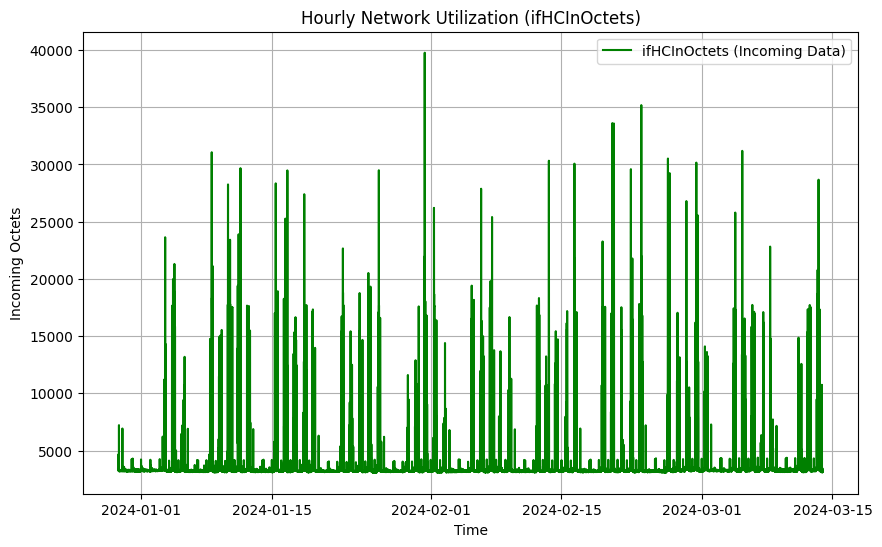

In [12]:
data = pd.read_csv(file_path)

# Convert the 'timestamp' column to a datetime format, interpreting it as seconds since the Unix epoch
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Set the 'timestamp' column as the index of the DataFrame
data.set_index('timestamp', inplace=True)

# Initialize the plot with a specified figure size
plt.figure(figsize=(10, 6))

# Plot the 'ifHCInOctets' column as a line graph
plt.plot(data['ifHCInOctets'], label='ifHCInOctets (Incoming Data)', color='green')

# Set the title of the plot
plt.title('Hourly Network Utilization (ifHCInOctets)')

# Set the label for the x-axis
plt.xlabel('Time')

# Set the label for the y-axis
plt.ylabel('Incoming Octets')

# Display the legend to identify the plotted line
plt.legend()

# Enable grid lines for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()


#### The plot above shows the hourly network utilization in terms of incoming octets (ifHCInOctets). Now, let's move forward with estimating the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to help identify an appropriate ARIMA model.

# Estimated ACF and PACF

### Autocorrelation Function (ACF):
#### Measures how the series is correlated with its past values at different lags. The ACF plot decays slowly, indicating the need for differencing to make the series stationary.

### Partial Autocorrelation Function (PACF):

#### Measures the direct relationship between the series and its lags, excluding intermediate lags. A significant spike at lag 1 suggests an autoregressive (AR) component.

### Autocorrelation and Partial Autocorelation Function computation

In [10]:
data = pd.read_csv(file_path)

# Convert the 'timestamp' to a datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Set the 'timestamp' as index inplace
data.set_index('timestamp', inplace=True)

# Compute all ACF and PACF values for 40 lags
nlags=40
acf_values = acf(data['ifHCInOctets'], nlags)
pacf_values = pacf(data['ifHCInOctets'], nlags)

# Print the ACF and PACF values
print("ACF values:", acf_values)
print("PACF values", pacf_values)


ACF values: [1.         0.61213022 0.34148856 0.24050185 0.21735567 0.19561246
 0.16432056 0.14563935 0.13555724 0.12847529 0.12182804 0.10635794
 0.09687827 0.10474912 0.10740178 0.10142324 0.09377127 0.08482121
 0.0919744  0.08848935 0.07403649 0.0541082  0.05289347 0.06021448
 0.06138499 0.05288544 0.04710867 0.05695832 0.07215325 0.07434658
 0.05784895 0.05584354 0.05558462 0.05052845 0.04929469 0.04120576
 0.03154598 0.03034542 0.02933546 0.02883437 0.03939225 0.04229292
 0.05530935 0.06025835]
PACF values [ 1.          0.61213022 -0.05311853  0.08480424  0.07451875  0.03545273
  0.0196412   0.03132438  0.02499092  0.02338424  0.02158592  0.00439353
  0.01524579  0.03369253  0.01659027  0.01238391  0.01197244  0.00468687
  0.02905082  0.00267954 -0.00397295 -0.0123343   0.01263858  0.01160791
  0.00553286 -0.00244399  0.00331107  0.0218959   0.02361882  0.00862729
 -0.01031247  0.01591249  0.00104579 -0.00220252  0.00881543 -0.00711339
 -0.00760258  0.00341819 -0.00269899  0.00288

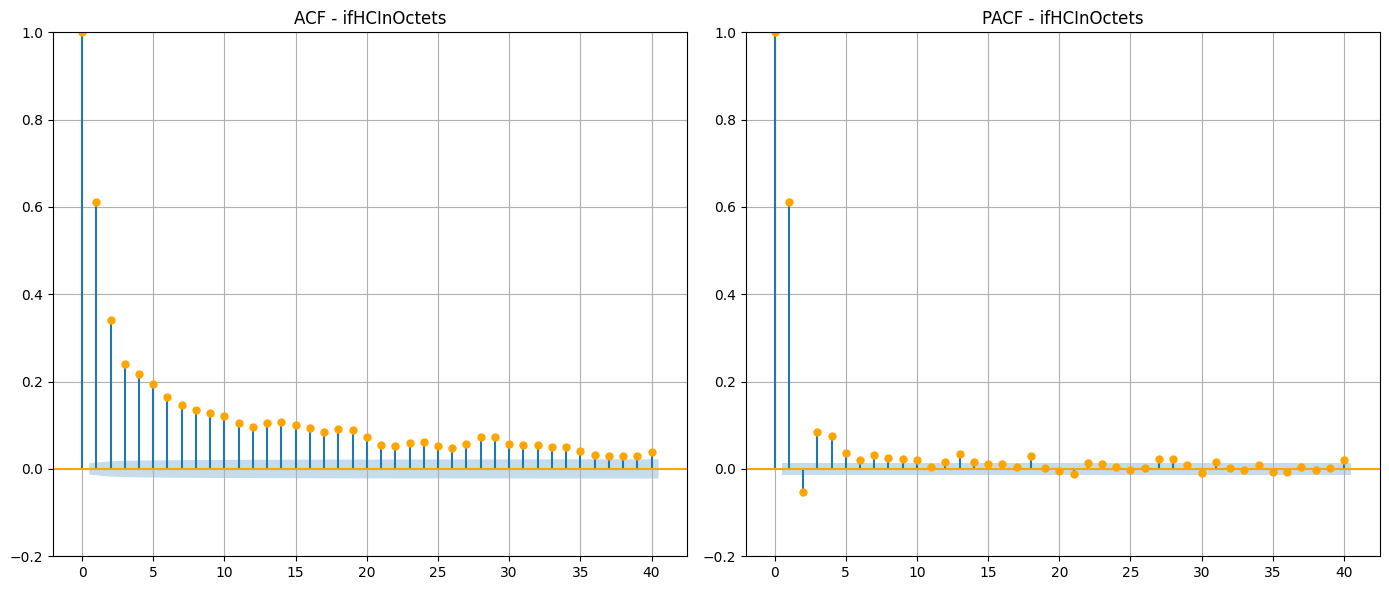

In [13]:
# Initialize the figure with a specified size
plt.figure(figsize=(14, 6))

# Plotting the ACF
plt.subplot(1, 2, 1)
plot_acf(data['ifHCInOctets'], lags=40, ax=plt.gca(), title="ACF - ifHCInOctets", color='orange')
plt.grid(True)  # Enable gridlines
plt.ylim(-0.2, 1)  # Adjust y-axis limits to show more positive values

# Plotting the PACF
plt.subplot(1, 2, 2)
plot_pacf(data['ifHCInOctets'], lags=40, ax=plt.gca(), title="PACF - ifHCInOctets", color='orange')
plt.grid(True)  # Enable gridlines
plt.ylim(-0.2, 1)  # Adjust y-axis limits to show more positive values

# Ensure layout does not overlap
plt.tight_layout()

# Display the plots
plt.show()


### The ACF and PACF plots help in determining the order of the ARIMA model:

#### The ACF shows how the current values of the series are correlated with past values at different lags.

#### The PACF shows a significant spike at lag 1, indicating that the series might have an autoregressive component.

# Estimated ARIMA Model and Parameters

#### Based on the ACF and PACF, we fitted an ARIMA(1,1,1) model, which incorporates:

#### AR(1): Autoregressive component at lag 1.
#### I(1): First-order differencing to make the series stationary.
#### MA(1): Moving average component at lag 1.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

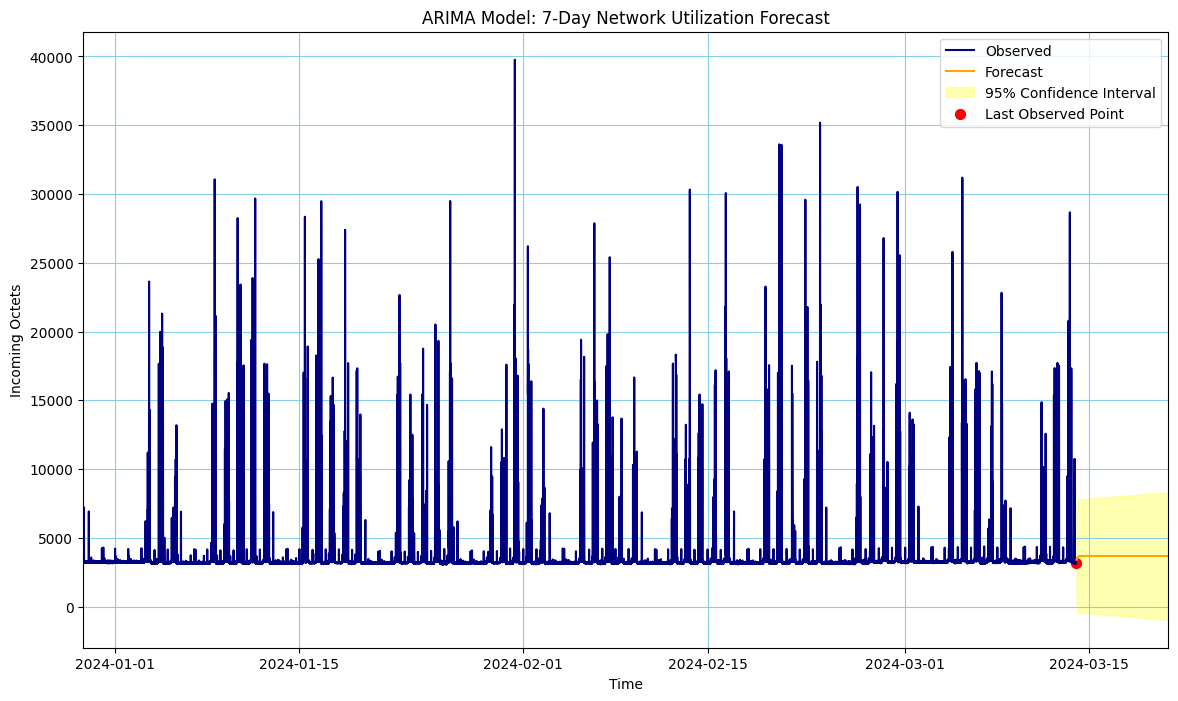

In [16]:
data = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime format, assuming it's in seconds since Unix epoch
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Make 'timestamp' the DataFrame index
data.set_index('timestamp', inplace=True)

# Initialize an ARIMA model with specified orders (e.g., ARIMA(1,1,1))
model = ARIMA(data['ifHCInOctets'], order=(1, 1, 1))
arima_result = model.fit()

# Generate a forecast for the next 168 hours (7 days)
forecast = arima_result.get_forecast(steps=168)
forecast_index = pd.date_range(data.index[-1] + pd.Timedelta(hours=1), periods=168, freq='H')

# Retrieve forecast mean and corresponding confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Initialize the plot for observed data and forecast
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['ifHCInOctets'], label='Observed', color='navy')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange')

# Include the confidence intervals in the plot
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='yellow', alpha=0.3, label='95% Confidence Interval')  # Confidence interval in yellow

# Highlight the last observed point
plt.scatter(data.index[-1], data['ifHCInOctets'].iloc[-1], color='red', s=50, label='Last Observed Point')

# Set plot title and axis labels
plt.title('ARIMA Model: 7-Day Network Utilization Forecast')
plt.xlabel('Time')
plt.ylabel('Incoming Octets')

# Adjust plot limits to include the forecast period
plt.xlim([data.index[0], forecast_index[-1]])

# Display the legend
plt.legend()

# Show gridlines, colored sky blue for better visibility
plt.grid(True, color='skyblue')

# Display the plot
plt.show()

# Check Stationarity with ADF Test

In [17]:
# Perform ADF test
adf_result = adfuller(data['ifHCInOctets'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

#If the p-value exceeds 0.05, it indicates that the data is non-stationary, suggesting that differencing may be necessary.

ADF Statistic: -15.48325515853713
p-value: 2.5400453609440004e-28


Since the p-value is very small and less than 0.05, hence our ADF test suggests that the data is statioinary.

# Plot ACF and PACF to Determine p and q

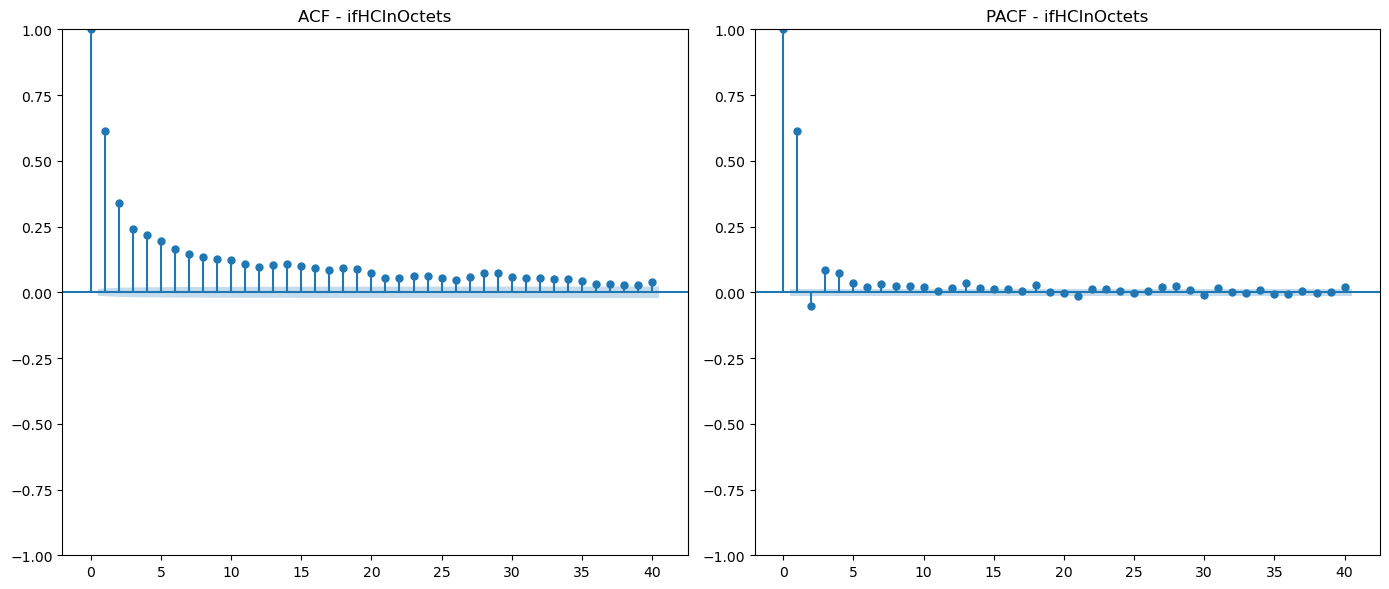

In [ ]:
# Plot ACF and PACF for 'ifHCInOctets'
plt.figure(figsize=(14, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(data['ifHCInOctets'], lags=40, ax=plt.gca(), title="ACF - ifHCInOctets")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(data['ifHCInOctets'], lags=40, ax=plt.gca(), title="PACF - ifHCInOctets")

plt.tight_layout()
plt.show()


# Fit ARIMA Model

In [18]:

# Fit ARIMA model
model = ARIMA(data['ifHCInOctets'], order=(1, 1, 1))
arima_result = model.fit()

# Print model summary
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           ifHCInOctets   No. Observations:                21704
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -191756.509
Date:                Wed, 11 Sep 2024   AIC                         383519.018
Time:                        04:09:47   BIC                         383542.973
Sample:                             0   HQIC                        383526.824
                              - 21704                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5725      0.002    275.711      0.000       0.568       0.577
ma.L1         -0.9778      0.001  -1017.601      0.000      -0.980      -0.976
sigma2      2.766e+06   5382.579    513.926      0.0

# Description Of  Obtained Results

### After running the ARIMA model on the time series data, the key results and their interpretations are:

# ACF and PACF Plots
PACF (Partial Autocorrelation Function)
This plot reveals the partial correlation between a time series and its lags, which is crucial for determining the number of autoregressive (AR) terms (p) to include in the model.

# ACF (Autocorrelation Function)
This function measures the correlation between the time series and its lagged values. A slow decay in the ACF plot suggests the need for differencing, while significant spikes are used to identify the number of moving average (MA) terms (q).

# Interpretation of ACF and PACF
Prominent spikes in the ACF plot suggest the number of MA terms to include. Notable spikes in the PACF plot help determine the number of AR terms needed.

# ADF Test for Stationarity
**ADF Statistic:** A large negative value typically indicates that the series is stationary.

**p-value:** A p-value less than 0.05 implies stationarity, meaning no differencing is required. Conversely, a p-value greater than 0.05 suggests non-stationarity, necessitating differencing (parameter d) in the ARIMA model.

**Interpretation of Stationarity:**
If the series is non-stationary, applying differencing, such as a first difference (d = 1), can often stabilize the series.









# ARIMA Model Parameters
**Differencing (d):**
Indicates the number of differences applied to achieve stationarity in the time series. Commonly, d = 1 signifies first-order differencing.

**AIC (Akaike Information Criterion):**
A criterion for comparing different models; a lower AIC indicates a better model fit, penalizing models that have excessive parameters which may lead to overfitting.

**AR (p) Coefficient:**
Reflects the estimated coefficient for the autoregressive component of the model, illustrating the influence of previous values on the current value.

**MA (q) Coefficient:**
Represents the estimated coefficient for the moving average segment of the model, detailing the impact of past forecast errors on current predictions

# Residual Analysis
After fitting the ARIMA model, it is important to check the residuals (the differences between actual and predicted values) to confirm they behave like white noise.

Residuals should exhibit a normal distribution, have a mean close to zero, and show no significant autocorrelation (i.e., uncorrelated errors).

Interpretation:
If the residuals display no significant autocorrelation and follow a normal distribution, it suggests that the ARIMA model has effectively captured most of the underlying structure in the data, indicating a good fit.

# Forecasting
Once the ARIMA model is fitted, it can be used to predict future values of the time series. The forecast includes:

Forecasted Values: These are the predicted future values of the time series.

Confidence Intervals: A range indicating where the actual future values are expected to fall, usually with a 95% confidence level.

Interpretation:
The forecast can be used to predict future demand or time series values. Confidence intervals provide insight into the uncertainty surrounding the predictions.

# Summary of Key Results:
Stationarity: Whether the data is stationary or not, as determined by the ADF test. ARIMA Parameters: The chosen values of p (autoregressive term), d (differencing), and q (moving average term). Model Fit: The AIC value helps evaluate how well the model fits the data. Residual Analysis: Ensures the errors (residuals) are random and normally distributed. Forecast: Provides predicted values for the future and their associated confidence intervals